# Solving equations tutorial 
### Prof. Marco Arieli Herrera-Valdez
### Facultad de Ciencias, Universidad Nacional Autónoma de México
_Created_: MAHV 2016/03/01

This tutorial shows how to quickly set up and numerically solve a differential equation of the form 
\begin{equation}
\partial_t w = w^a \left( \frac{ w_{\infty} - w }{\tau} \right)  
\end{equation}
Note that if $a=0$ then the equation has linear dynamics. If $a=1$, then the dynamics are logistic. 
Let us define the right hand side of the equation.
The solutions will be calculated using python (www.python.org).


#### Basic definitions and setup 

First, import the necessary modules and perform tests.

In [24]:
import scipy as sc
import matplotlib.pylab as gr
sc.test("all",verbose=10) #If 
%matplotlib inline

nose.config: INFO: Ignoring files matching ['^\\.', '^_', '^setup\\.py$']
nose.config: INFO: Excluding tests matching ['f2py_ext', 'f2py_f90_ext', 'gen_ext', 'pyrex_ext', 'swig_ext']


Running unit tests for scipy
NumPy version 1.10.4
NumPy relaxed strides checking option: False
NumPy is installed in /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy
SciPy version 0.17.0
SciPy is installed in /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy
Python version 3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
nose version 1.3.7


runTest (test_interpolate_wrapper.Test) ... ok

----------------------------------------------------------------------
Ran 1 test in 3.592s

OK


Now define a function that calculates the derivative of $w$ from the equation above.

In [43]:
def gLogistic(w,t,p):
    return w**p['a'] * (p['wInf']-w) / p['tau']

### Numerical solution of the system for a fixed choice of parameters

Setup the initial conditions, a set of simulation time steps, and a dictionary with the parameters for the simulations

In [46]:
w0=0.1
sampTimes=sc.arange(0,30,0.01)
pars={"a":0.0, "wInf":0.735, "tau":2.0}

Use the solver *odeint* to calculate the solution for $w(t)$

In [ ]:
w=sc.integrate.odeint(func=gLogistic, y0=w0, t=sampTimes, args=(pars,)).transpose()

and plot the results

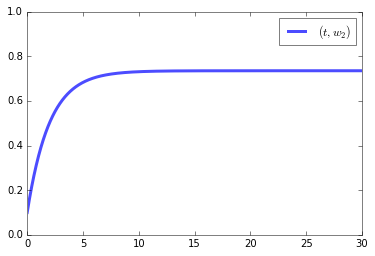

In [45]:
gr.figure(); 
gr.plot(sampTimes, w[0], lw=3, alpha=0.7, label=r"$(t,w_{%d})$"%aVals[n])
gr.ylim(0,1)
gr.legend()

### Numerical solutions for different choices of parameters

Now obtain different solutions that correspond to different values of $a \in \{0,1,2 \}$, while all other parameters and initial conditions kept the same. 

In [41]:
w0=0.1
sampTimes=sc.arange(0,30,0.01)
aVals= sc.array([0,1.0,2.0])
nSimulations= len(aVals)
pars=list()
pars={"a":0.0, "wInf":0.5, "tau":2.0}
simulations=list()
for n in sc.arange(0, nSimulations):
    pars["a"] = aVals[n]
    w=sc.integrate.odeint(func=gLogistic, y0=w0, t=sampTimes, args=(pars,)).transpose()
    simulations.append(w)

Plot the results in the same graph to compare the convergence toward steady states.

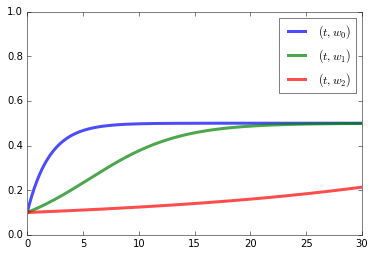

In [34]:
gr.figure(); gr.ioff()
for n in sc.arange(0, nSimulations):
    gr.plot(sampTimes, simulations[n][0], lw=3, alpha=0.7, label=r"$(t,w_{%d})$"%aVals[n])
    gr.ylim(0,1)
gr.legend()
gr.ion(); gr.draw()